In [ ]:
# Start writing code here...from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
spotify_songs = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')


Q1 = np.percentile(spotify_songs.duration_ms, 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(spotify_songs.duration_ms, 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

"""
mask = (spotify_songs.duration_ms < (Q3+1.5*IQR))
mask2 = spotify_songs.duration_ms > (Q1-1.5*IQR)
spotify_data_cleaned = spotify_songs.loc[mask]
spotify_data_cleaned = spotify_data_cleaned.loc[mask2]
"""
spotify_data_cleaned = spotify_songs
spotify_data_cleaned.track_album_release_date.str[:4]
spotify_data_cleaned.track_album_release_date.str[5:7]
spotify_data_cleaned = spotify_data_cleaned.assign(
    track_album_release_month = spotify_data_cleaned.track_album_release_date.str[5:7],
    track_album_release_year = spotify_data_cleaned.track_album_release_date.str[:4],
)
spotify_data_cleaned.drop(columns="track_album_release_date",inplace=True)
spotify_data_cleaned.track_album_release_year = spotify_data_cleaned.track_album_release_year.astype("int64")
"""
mask = (spotify_data_cleaned.track_popularity > 0)
spotify_data_cleaned = spotify_data_cleaned.loc[mask]
"""


'\nmask = (spotify_data_cleaned.track_popularity > 0)\nspotify_data_cleaned = spotify_data_cleaned.loc[mask]\n'

In [ ]:
features = ["track_popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo", "duration_ms", "track_album_release_year"]
classe = ["edm", "latin", "pop","r&b","rap","rock"  ]

def quanti(data):
    columns = features
    data_norme = data[columns]
    return data_norme


In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalisation(data):
    columns = ["track_popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo", "duration_ms", "track_album_release_year"]
    data_norme = data[columns]
    scaler = MinMaxScaler(feature_range=(0,1))
    data_norme = pd.DataFrame(scaler.fit_transform(data_norme), columns=columns)
    return data_norme


In [ ]:
playlist = spotify_data_cleaned.groupby(['playlist_name'])["track_popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo", "duration_ms", "track_album_release_year"].mean()


playlist_normed = pd.DataFrame(normalisation(playlist))
playlist_normed.index = playlist.index


playlist_normed["playlist_genre"] = ""


def ajout_genre() :
    c = 0
    for i in playlist_normed.index :
        df = spotify_data_cleaned.loc[spotify_data_cleaned["playlist_name"] == i]
        playlist_normed['playlist_genre'].iloc[c] = df['playlist_genre'].iloc[0]
        c+=1

ajout_genre() 
playlist_normed


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_album_release_year,playlist_genre
playlist_name,,,,,,,,,,,,,
"""Permanent Wave""",0.418955,0.740951,0.690134,0.693573,0.049566,0.109017,0.134061,0.056671,0.890933,0.607933,0.493963,0.396098,rock
10er Playlist,0.827012,0.783361,0.667151,0.906427,0.208123,0.197775,0.016833,0.054013,0.600701,0.638147,0.366928,0.869493,pop
1987-1997 OLD SKOOL JAMZ,0.310404,0.814908,0.667366,0.800322,0.100405,0.200622,0.008778,0.036444,0.795910,0.581887,0.502109,0.512770,r&b
2000's hard rock,0.584681,0.368720,0.953935,0.949428,0.206255,0.000000,0.103596,0.116160,0.528281,0.898566,0.399206,0.611022,rock
2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016 - 2017 - 2018 - 2019 - 2020 TOP HITS,0.807191,0.768148,0.645931,0.909005,0.198705,0.209437,0.000690,0.106911,0.614716,0.634919,0.309571,0.898398,edm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
💊ELECTRO-HOUSE-TECH💊,0.380454,0.926707,0.783650,0.828438,0.192476,0.033494,0.665749,0.028678,0.437832,0.720218,0.589294,0.934647,edm
🔊BASSBOOSTED🔊⚡ELECTRO HOUSE⚡🔥EDM CAR MUSIC2018/2019🔥,0.454610,0.880228,0.724533,0.866544,0.286564,0.168423,0.214862,0.115558,0.365156,0.717827,0.282782,0.941297,edm
"🔥💵 Hip Hop, Rap, Heavy 808's - New School",0.367156,0.893294,0.548391,0.852695,0.647603,0.202065,0.000977,0.096947,0.396017,0.791428,0.338426,0.929065,rap


In [ ]:
# nécessaire pour la visualisation stylax
playlist_normed['playlist_number'] = 10
for i in playlist_normed.index: 
    if playlist_normed.playlist_genre[i] == 'edm' :
        playlist_normed['playlist_number'][i] = 0
    if playlist_normed.playlist_genre[i] == 'latin' :
        playlist_normed['playlist_number'][i] = 1
    if playlist_normed.playlist_genre[i] == 'pop' :
        playlist_normed['playlist_number'][i] = 2
    if playlist_normed.playlist_genre[i] == 'r&b' :
        playlist_normed['playlist_number'][i] = 3
    if playlist_normed.playlist_genre[i] == 'rap' :
        playlist_normed['playlist_number'][i] = 4
    if playlist_normed.playlist_genre[i] == 'rock' :
        playlist_normed['playlist_number'][i] = 5

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [ ]:
playlist_normed2 = playlist_normed.drop(columns="playlist_genre",axis=1)
playlist_normed2 = playlist_normed2.drop(columns="playlist_number",axis=1)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='playlist_genre', ylabel='count'>

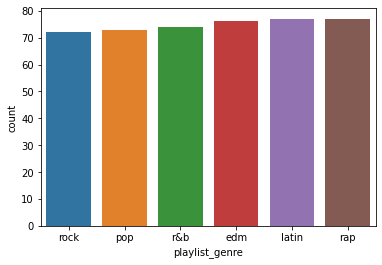

In [ ]:
sns.countplot(playlist_normed.playlist_genre)

In [ ]:
!pip install dtreeviz

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
X= playlist_normed2  # Features
y= playlist_normed.playlist_number  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

from sklearn import tree

clf = tree.DecisionTreeClassifier(max_leaf_nodes=6, criterion='gini')
clf = clf.fit(X_train, y_train)


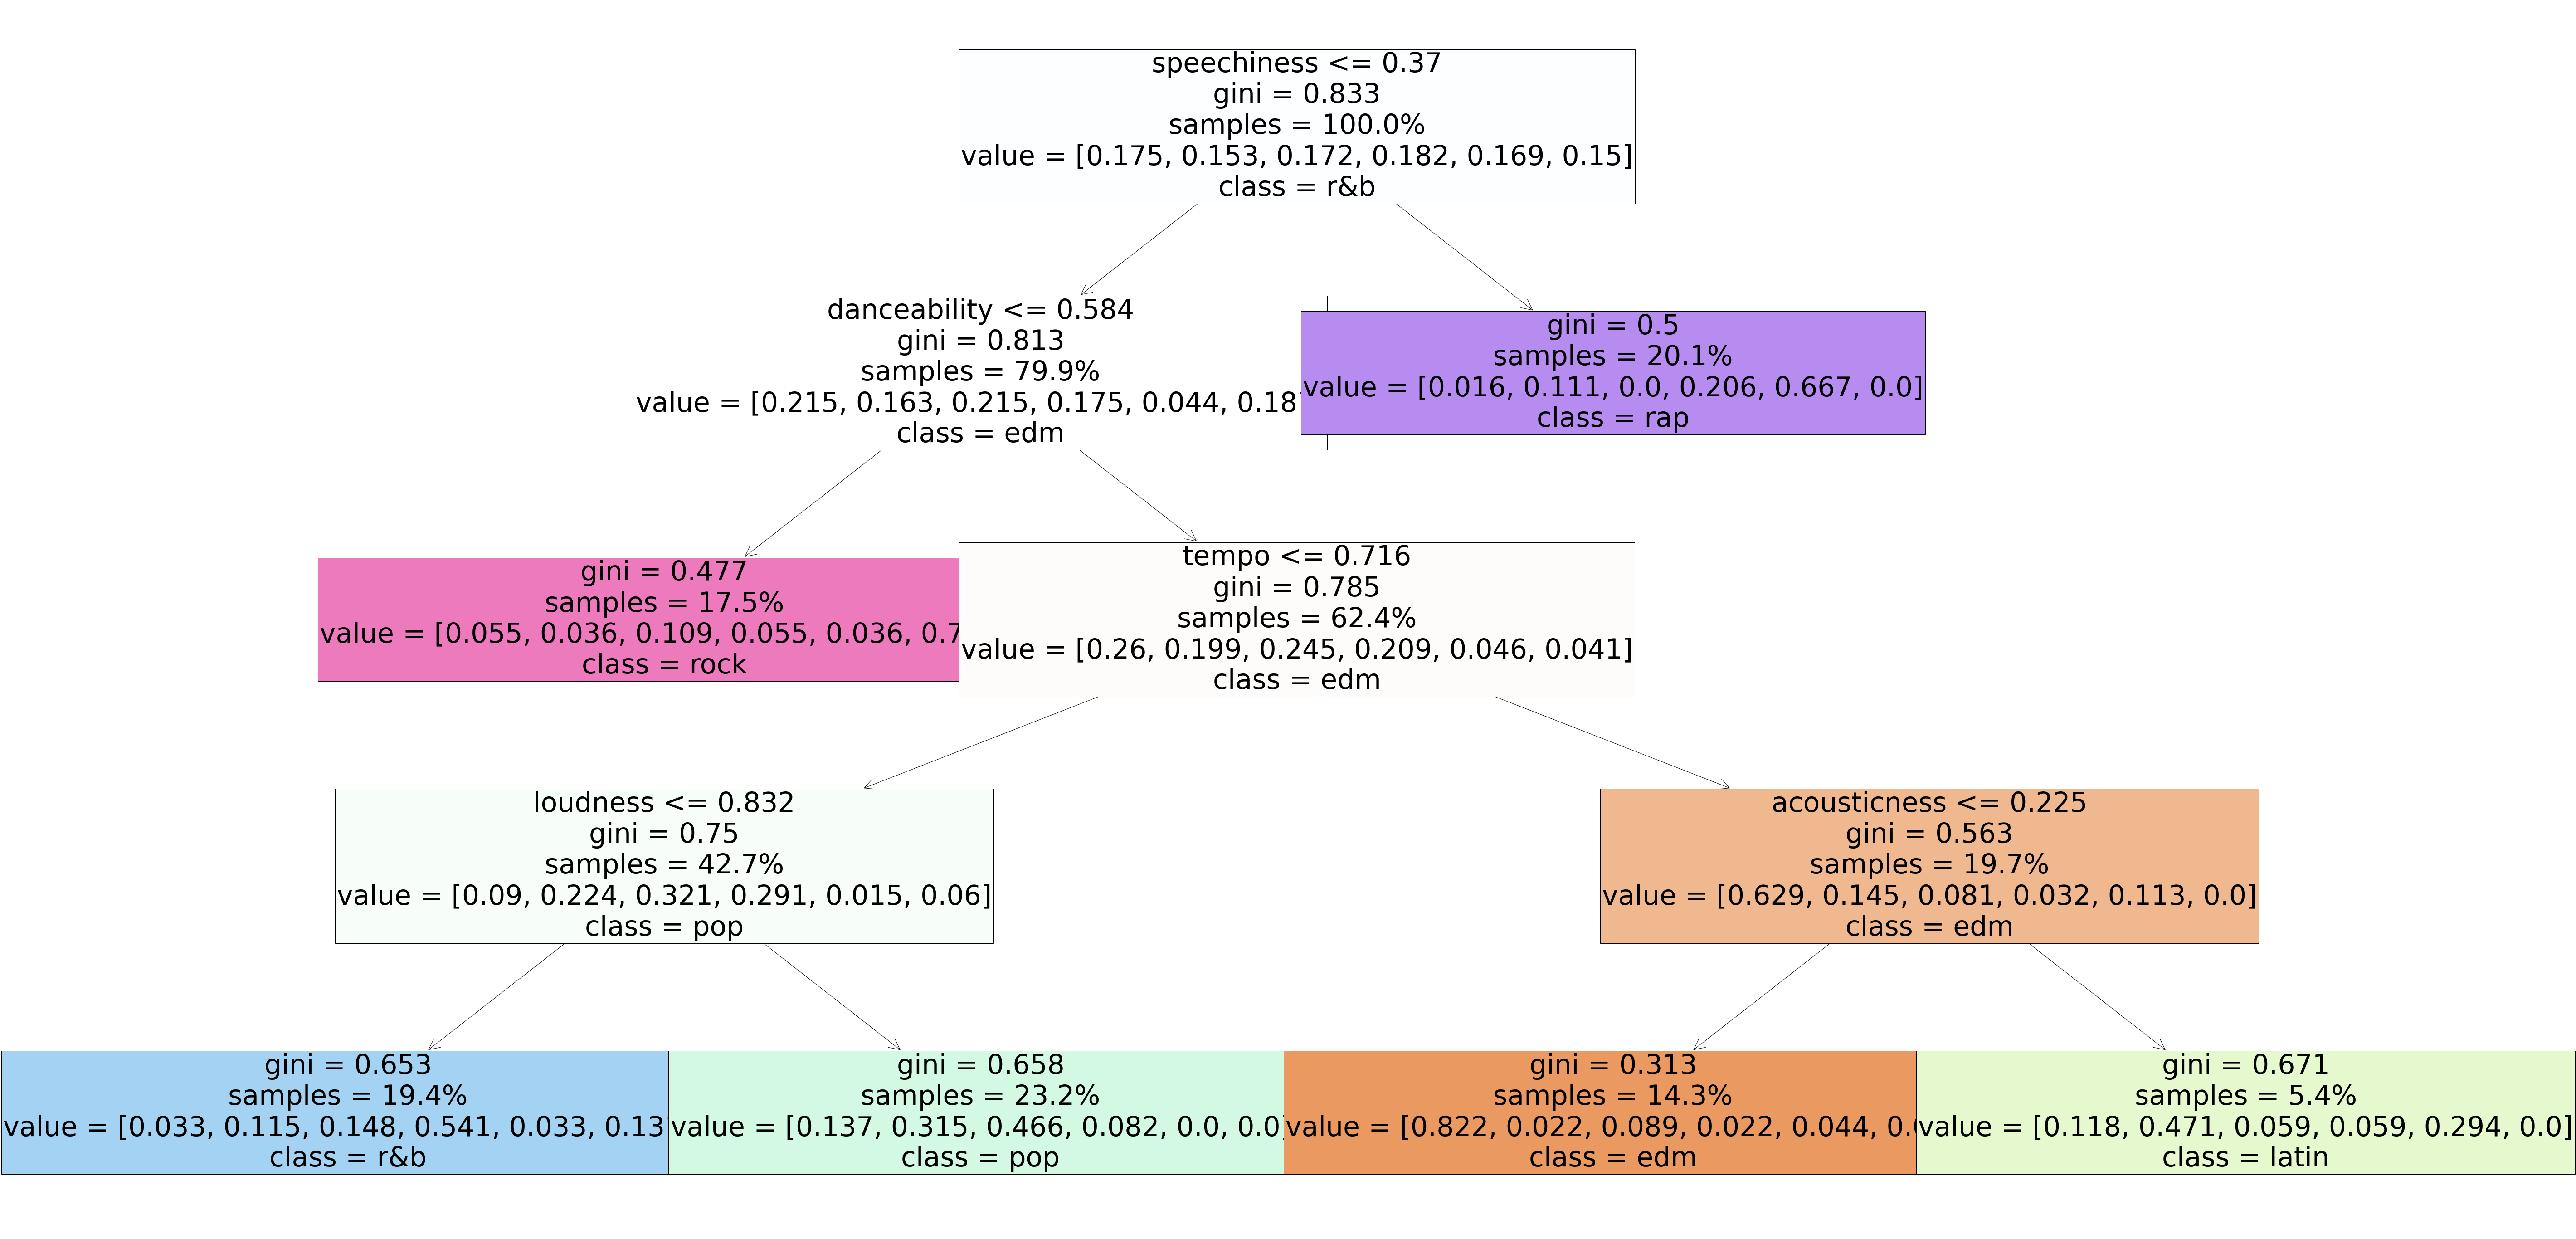

In [ ]:
fig = plt.figure(figsize=(100,50))
_ = tree.plot_tree(clf, 
                   feature_names=features, 
                   class_names= classe, 
                   filled=True,
                   proportion=True,
                   fontsize=60)

fig.savefig("decistion_tree.png")



**https://mljar.com/blog/visualize-decision-tree/**

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


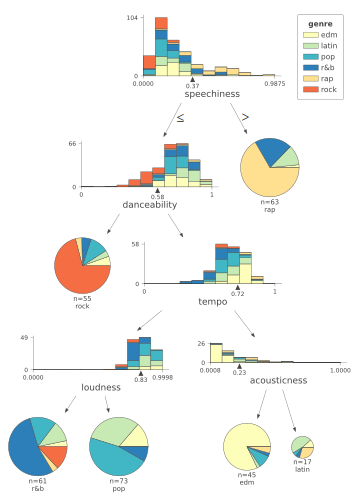

In [ ]:
from dtreeviz.trees import dtreeviz 

viz = dtreeviz(
        clf,
        X_train, 
        y_train, 
        target_name="genre", 
        feature_names=features, 
        class_names=list(classe)
    )

viz


In [ ]:
clf.score(X_test,y_test)

0.5925925925925926

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c2ad4461-7f35-42f5-b2d9-f686e8952f67' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>